## Assessing Portfolio Volatility

### Import Libraries


In [1]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Generate DataFrame with "Adj Close" values of all the stocks

In [2]:
def generate_dataframe(assets):
    df = pd.DataFrame()

    for stock in assets:
        df[stock] = web.DataReader(stock, data_source='yahoo',start='2019-1-1' ,end='2020-1-1')['Adj Close']
    
    return df


### Calaculate Volatility

In [3]:
def volatility(df,weight):
   
    return_stock=df.pct_change()
    variance=return_stock.var(axis=0)
    covariance=return_stock.cov()
    
    variance=np.array(variance).reshape((len(weight),1))
    weights=np.array(weight).reshape((1,len(weight)))
    
    A=np.dot(weights**2,variance)
    
    b=0
    for i in range(len(weight)):
        for j in range(i):
            b+=2*weight[i]*weight[j]*covariance.iloc[i,j]
            
    
    return A+b

Enter stocks symbol	GOOGL AMZN FB TSLA NFLX
total 5 stocks
Enter corresponding Weights	0.1 0.2 0.2 0.3 0.2
Volatility of the Portfolo is	
0.02444373953271689 %


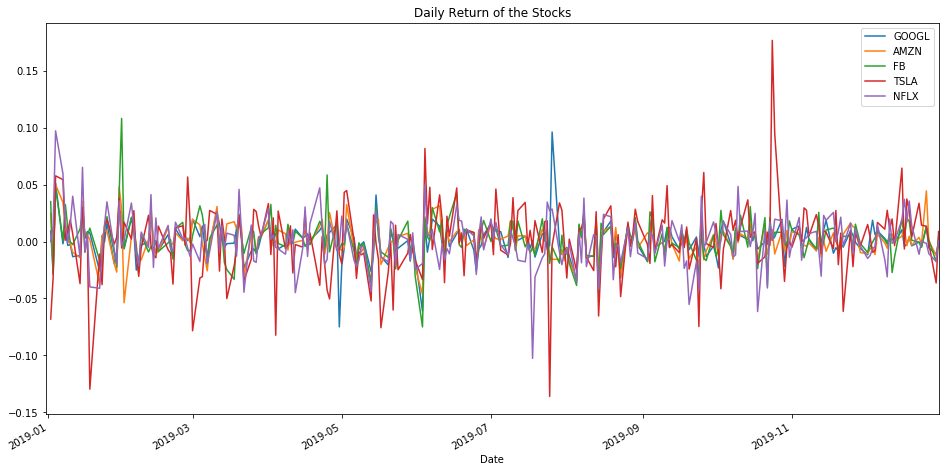

In [4]:
############################# FOR TAKING INPUTS FROM USER ############################

stocks=input("Enter stocks symbol\t").split()
count=len(stocks)
print(f'total {count} stocks')

while True:
    x=input("Enter corresponding Weights\t").split()
    weights=[float(i) for i in x]
    if sum(weights)!=1.0:
        print("sum of the weights is not 1")
    elif len(weights)!=count:
        print("len of weight is not equal to that of Stocks")
    else : break

####################################################################################

df=generate_dataframe(stocks)
port_volatility=volatility(df,weights)

print(f"Volatility of the Portfolo is\t")
print(f"{float(port_volatility)*100} %")

df.pct_change().plot(figsize=(16,8),title="Daily Return of the Stocks")